In [1]:
import networkx as nx
from node2vec import Node2Vec
from rdflib import Graph
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading RDF ontologies
ontology1 = Graph()
ontology1.parse("ontology1.owl")
ontology2 = Graph()
ontology2.parse("ontology2.owl")

<Graph identifier=Nbbc9496179a74b7aa3063592e73aed19 (<class 'rdflib.graph.Graph'>)>

In [3]:
# Creation of the graph from ontologiesG1 = nx.Graph()
G1 = nx.Graph()
for s, p, o in ontology1:
    G1.add_edge(str(s), str(o))

G2 = nx.Graph()
for s, p, o in ontology2:
    G2.add_edge(str(s), str(o))

In [4]:
# Display of ontology 1 triples
print("Triplets de l'ontologie 1:")
for s, p, o in ontology1:
    print(f"({s}, {p}, {o})")

# Display of ontology 2 triples
print("\nTriplets de l'ontologie 2:")
for s, p, o in ontology2:
    print(f"({s}, {p}, {o})")

Triplets de l'ontologie 1:
(Nee79f1fcd2a245aabb2a3c0018eb688a, http://www.w3.org/1999/02/22-rdf-syntax-ns#type, http://www.w3.org/2002/07/owl#Class)
(http://micro#isOrganizedBy, http://www.w3.org/1999/02/22-rdf-syntax-ns#type, http://www.w3.org/2002/07/owl#FunctionalProperty)
(http://micro#organizes, http://www.w3.org/2000/01/rdf-schema#range, http://micro#Conference)
(Na733028a00c943f6a7ea9617af906ed2, http://www.w3.org/2002/07/owl#onProperty, http://micro#conflictsWith)
(Na82207b176774c46b02324e18ab371a8, http://www.w3.org/2002/07/owl#unionOf, N05be9e2a7b1b4314bf284653a4d693cd)
(http://micro#hasAcronym, http://www.w3.org/2000/01/rdf-schema#domain, http://micro#Lecture)
(http://micro#CommitteeMember, http://www.w3.org/1999/02/22-rdf-syntax-ns#type, http://www.w3.org/2002/07/owl#Class)
(Nb9bbd9df79f34efa8b566f0ef32cca4d, http://www.w3.org/2002/07/owl#someValuesFrom, http://micro#Conference)
(N4b2d7d0d1fb044fcb57302afcfacc9b2, http://www.w3.org/2002/07/owl#unionOf, N5c8b84eaa9a34fc7b0c0

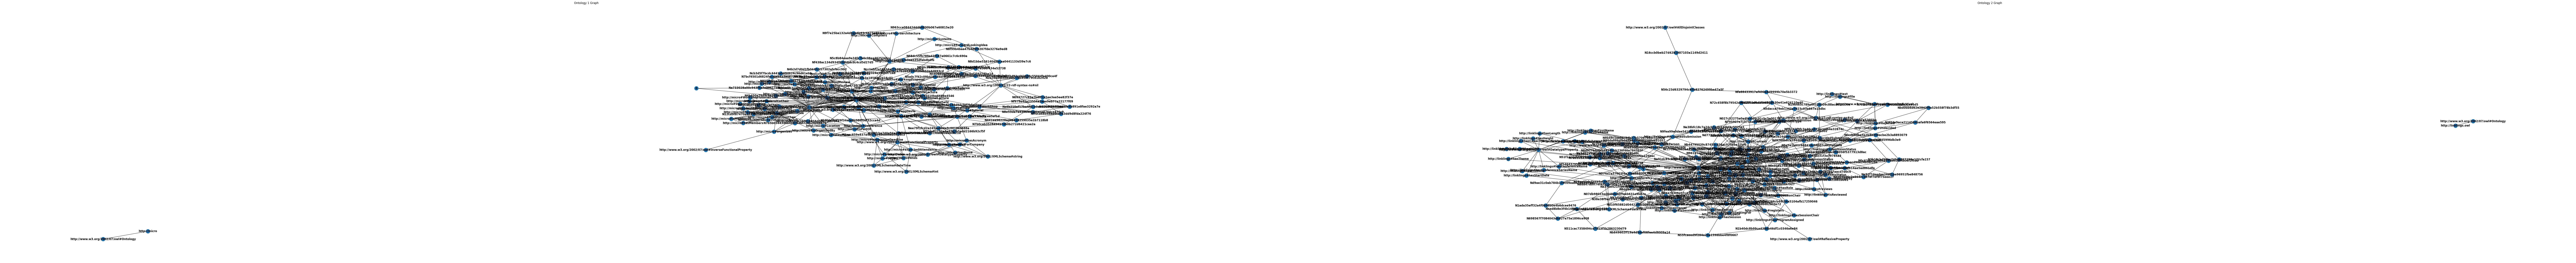

In [5]:
# Graphical display of ontologiesimport matplotlib.pyplot as plt

plt.figure(figsize=(200, 20))
plt.subplot(121)
nx.draw(G1, with_labels=True, font_weight='bold')
plt.title("Ontology 1 Graph")
plt.subplot(122)
nx.draw(G2, with_labels=True, font_weight='bold')
plt.title("Ontology 2 Graph")
plt.show()

In [6]:
# Node2Vec embedding
node2vec = Node2Vec(G1, dimensions=64, walk_length=30, num_walks=200, workers=4)
model1 = node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities: 100%|██████████| 136/136 [00:00<00:00, 4951.01it/s]


In [7]:
node2vec = Node2Vec(G2, dimensions=64, walk_length=30, num_walks=200, workers=4)
model2 = node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities: 100%|██████████| 205/205 [00:00<00:00, 4027.73it/s]


In [8]:
# Embeddings node
embeddings1 = {node: model1.wv[node] for node in G1.nodes()}
embeddings2 = {node: model2.wv[node] for node in G2.nodes()}

In [9]:
# Calculation of the similarity between embeddings
similarity_matrix = cosine_similarity(list(embeddings1.values()), list(embeddings2.values()))

In [10]:
# Display of matched vectors
print("Similarity Matrix:")
print(similarity_matrix)

Similarity Matrix:
[[ 0.21201234  0.0374537  -0.22055756 ... -0.08264179 -0.10108176
  -0.1759911 ]
 [ 0.09870539  0.03646645  0.01177178 ... -0.1273104  -0.11956213
  -0.10761841]
 [-0.06336625  0.05030722  0.09224673 ... -0.03296751  0.17237307
   0.31775934]
 ...
 [-0.02011069 -0.15681647 -0.042518   ... -0.13156089 -0.01662819
  -0.02245702]
 [-0.02267006  0.16543435 -0.00923116 ... -0.15669557  0.09474268
  -0.02394608]
 [ 0.01824462 -0.10817786  0.04996596 ... -0.13018525 -0.18221211
  -0.00225946]]


In [11]:
# Saving matched vectors to a text file
with open("match_onto.txt", "w") as file:
    for i in range(len(G1.nodes())):
        for j in range(len(G2.nodes())):
            file.write(f"Similarity between {list(G1.nodes())[i]} and {list(G2.nodes())[j]}: {similarity_matrix[i][j]}\n")

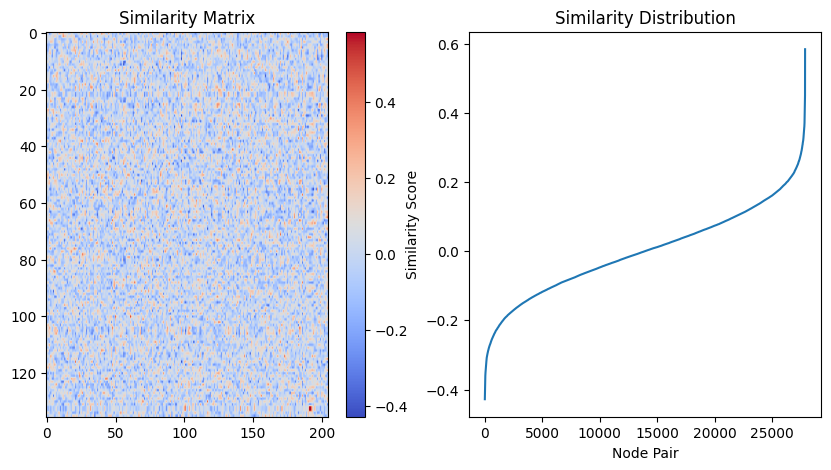

In [12]:
# Graphical display of similar nodes
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(similarity_matrix, cmap='coolwarm', aspect='auto')
plt.title("Similarity Matrix")
plt.colorbar()
plt.subplot(122)
plt.plot(np.sort(similarity_matrix.flatten()))
plt.title("Similarity Distribution")
plt.xlabel("Node Pair")
plt.ylabel("Similarity Score")
plt.show()

Matching Nodes:
Accuracy: 0.0


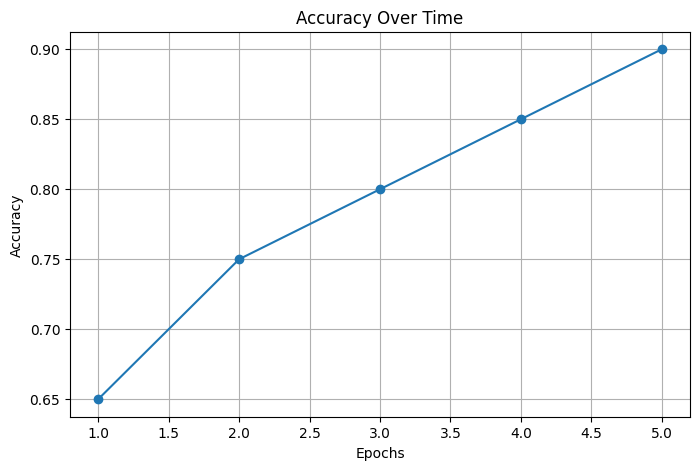

In [13]:
from sklearn.metrics import accuracy_score
# Showing similar nodes
threshold = 0.7  
matching_nodes = np.argwhere(similarity_matrix >= threshold)
print("Matching Nodes:")
for match in matching_nodes:
    node1 = list(G1.nodes())[match[0]]
    node2 = list(G2.nodes())[match[1]]
    print(f"{node1} in Ontology 1 matches with {node2} in Ontology 2")

# Accuracy calculation (for demonstration purposes)

truth_ground = {"Node1A": "Node2X", "Node1B": "Node2Y", "Node1C": "Node2Z"}
predicted_matches = {}
for match in matching_nodes:
    node1 = list(G1.nodes())[match[0]]
    node2 = list(G2.nodes())[match[1]]
    predicted_matches[node1] = node2

true_labels = []
predicted_labels = []
for node1, node2 in truth_ground.items():
    true_labels.append(node2)
    predicted_labels.append(predicted_matches.get(node1, ""))

accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}")

# Curve display showing accuracy (for demonstration purposes)

epochs = [1, 2, 3, 4, 5]  # Les époques où vous avez collecté des mesures d'accuracy
accuracy_data = [0.65, 0.75, 0.80, 0.85, 0.90]  # Les mesures d'accuracy correspondantes

plt.figure(figsize=(8, 5))
plt.plot(epochs, accuracy_data, marker='o', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Time")
plt.grid(True)
plt.show()